In [9]:
import pandas as pd

# Load train & test dataset with rare data class (after CTGAN resampling)

In [10]:
train_link = '/content/drive/MyDrive/Dataset/CICIDS2017/train and test/train_data.csv'
rare_link = '/content/drive/MyDrive/Dataset/CICIDS2017/train and test/resampling.csv'
test_link = '/content/drive/MyDrive/Dataset/CICIDS2017/train and test/test_data.csv'

In [11]:
train = pd.read_csv(train_link)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696725 entries, 0 to 1696724
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow Duration                int64  
 1   Total Fwd Packets            int64  
 2   Total Backward Packets       int64  
 3   Total Length of Fwd Packets  int64  
 4   Total Length of Bwd Packets  int64  
 5   Fwd Packet Length Max        int64  
 6   Fwd Packet Length Min        int64  
 7   Fwd Packet Length Mean       float64
 8   Fwd Packet Length Std        float64
 9   Bwd Packet Length Max        int64  
 10  Bwd Packet Length Min        int64  
 11  Bwd Packet Length Mean       float64
 12  Bwd Packet Length Std        float64
 13  Flow Bytes/s                 float64
 14  Flow Packets/s               float64
 15  Flow IAT Mean                float64
 16  Flow IAT Std                 float64
 17  Flow IAT Max                 int64  
 18  Flow IAT Min                 int64  
 19  

In [12]:
rare = pd.read_csv(rare_link)
rare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                30000 non-null  int64  
 1   Total Fwd Packets            30000 non-null  int64  
 2   Total Backward Packets       30000 non-null  int64  
 3   Total Length of Fwd Packets  30000 non-null  int64  
 4   Total Length of Bwd Packets  30000 non-null  int64  
 5   Fwd Packet Length Max        30000 non-null  int64  
 6   Fwd Packet Length Min        30000 non-null  int64  
 7   Fwd Packet Length Mean       30000 non-null  float64
 8   Fwd Packet Length Std        30000 non-null  float64
 9   Bwd Packet Length Max        30000 non-null  int64  
 10  Bwd Packet Length Min        30000 non-null  int64  
 11  Bwd Packet Length Mean       30000 non-null  float64
 12  Bwd Packet Length Std        30000 non-null  float64
 13  Flow Bytes/s    

In [13]:
trainset = pd.concat([train, rare], ignore_index=True)
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726725 entries, 0 to 1726724
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow Duration                int64  
 1   Total Fwd Packets            int64  
 2   Total Backward Packets       int64  
 3   Total Length of Fwd Packets  int64  
 4   Total Length of Bwd Packets  int64  
 5   Fwd Packet Length Max        int64  
 6   Fwd Packet Length Min        int64  
 7   Fwd Packet Length Mean       float64
 8   Fwd Packet Length Std        float64
 9   Bwd Packet Length Max        int64  
 10  Bwd Packet Length Min        int64  
 11  Bwd Packet Length Mean       float64
 12  Bwd Packet Length Std        float64
 13  Flow Bytes/s                 float64
 14  Flow Packets/s               float64
 15  Flow IAT Mean                float64
 16  Flow IAT Std                 float64
 17  Flow IAT Max                 int64  
 18  Flow IAT Min                 int64  
 19  

In [ ]:
inport gc
del rare
gc.collect()

In [14]:
testset = pd.read_csv(test_link)
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131151 entries, 0 to 1131150
Data columns (total 78 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow Duration                1131151 non-null  int64  
 1   Total Fwd Packets            1131151 non-null  int64  
 2   Total Backward Packets       1131151 non-null  int64  
 3   Total Length of Fwd Packets  1131151 non-null  int64  
 4   Total Length of Bwd Packets  1131151 non-null  int64  
 5   Fwd Packet Length Max        1131151 non-null  int64  
 6   Fwd Packet Length Min        1131151 non-null  int64  
 7   Fwd Packet Length Mean       1131151 non-null  float64
 8   Fwd Packet Length Std        1131151 non-null  float64
 9   Bwd Packet Length Max        1131151 non-null  int64  
 10  Bwd Packet Length Min        1131151 non-null  int64  
 11  Bwd Packet Length Mean       1131151 non-null  float64
 12  Bwd Packet Length Std        1131151 non-n

#Encode categorical data

In [15]:
# Print count of each type
print(trainset['Label'].value_counts())

BENIGN              1361979
DoS Hulk             138547
PortScan              95405
DDoS                  76909
Bot                   11167
Infiltration          10025
Heartbleed            10006
DoS GoldenEye          6207
FTP-Patator            4744
SSH-Patator            3583
DoS slowloris          3498
DoS Slowhttptest       3329
Web Attack             1326
Name: Label, dtype: int64


In [ ]:
trainset_label = trainset['Label'].map({
    'BENIGN': 0,
    'DoS Hulk': 1,        
    'DoS GoldenEye': 2, 
    'DoS slowloris': 3,       
    'DoS Slowhttptest': 4,
    'DDoS': 5, 
    'PortScan': 6, 
    'FTP-Patator': 7, 
    'SSH-Patator': 8, 
    'Web Attack': 9, 
    'Bot': 10, 
    'Infiltration': 11,
    'Heartbleed': 12,     
})

In [27]:
trainset.drop('Label', axis=1, inplace=True)

In [25]:
trainset_label.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [16]:
# Print count of each type
print(testset['Label'].value_counts())

BENIGN              909341
DoS Hulk             91577
PortScan             63399
DDoS                 51116
DoS GoldenEye         4086
FTP-Patator           3191
SSH-Patator           2314
DoS slowloris         2298
DoS Slowhttptest      2170
Web Attack             854
Bot                    789
Infiltration            11
Heartbleed               5
Name: Label, dtype: int64


In [17]:
testset_label = testset['Label'].map({
    'BENIGN': 0,
    'DoS Hulk': 1,        
    'DoS GoldenEye': 2, 
    'DoS slowloris': 3,       
    'DoS Slowhttptest': 4,
    'DDoS': 5, 
    'PortScan': 6, 
    'FTP-Patator': 7, 
    'SSH-Patator': 8, 
    'Web Attack': 9, 
    'Bot': 10, 
    'Infiltration': 11,
    'Heartbleed': 12,     
})

In [ ]:
testset.drop('Label', axis=1, inplace=True)

In [22]:
testset_label.head(5)

0    6
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

# Random Forest modeling

In [19]:
# Importing Required Library
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [60]:
def evaluation(y_test, y_pred):
  print('Misclassified samples: %d' % (y_test != y_pred).sum())
  result = confusion_matrix(y_test, y_pred, normalize='true')
  #print("Confusion Matrix:")
  #print(result)
  sns.heatmap(result, annot=True)
  result1 = classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)
  result2 = 100* accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)
  result3 = precision_score(y_test, y_pred, average='weighted')
  print("Precision:",result3)
  result4 = recall_score(y_test, y_pred, average='weighted')
  print("Recall:",result4)
  result5 = f1_score(y_test, y_pred, average='weighted')
  print("F1:",result5)

In [23]:
rf = RandomForestClassifier(random_state = 1, n_estimators=100)

In [31]:
rf.fit(trainset, trainset_label)

RandomForestClassifier(random_state=1)

In [32]:
prediction = rf.predict(testset)

Misclassified samples: 1458
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    909341
           1       1.00      1.00      1.00     91577
           2       1.00      0.99      1.00      4086
           3       1.00      0.99      1.00      2298
           4       0.95      0.99      0.97      2170
           5       1.00      1.00      1.00     51116
           6       0.99      1.00      1.00     63399
           7       1.00      1.00      1.00      3191
           8       1.00      0.99      1.00      2314
           9       0.99      0.94      0.96       854
          10       0.87      0.71      0.78       789
          11       1.00      0.45      0.62        11
          12       1.00      1.00      1.00         5

    accuracy                           1.00   1131151
   macro avg       0.98      0.93      0.95   1131151
weighted avg       1.00      1.00      1.00   1131151

Accuracy: 99.87110474198406


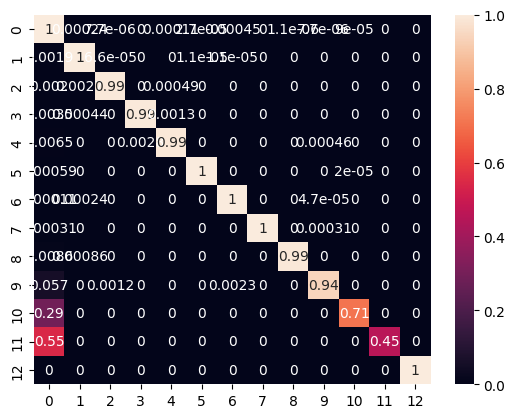

In [61]:
evaluation(testset_label, prediction)

# Save the model

In [59]:
import joblib
# Save the model to an H5 file
joblib.dump(rf, '/content/drive/MyDrive/Models/RF_CTGAN.h5')

['/content/drive/MyDrive/Models/RF_CTGAN.h5']